In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
!mkdir /home/aistudio/external-libraries

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 247.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 6.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 191.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 343.4 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 267.3 kB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 172.0 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 5.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 kB 925.6 kB/s eta 0:00:0000:01
     ━━━━━━━━━━

In [2]:
import pandas as pd 
binary_train123 = pd.read_csv('data/data153624/binary_train123.csv')
binary_test123 = pd.read_csv('data/data153624/binary_test123.csv')

# 第一步,获取列名
col = list(binary_train123.columns)
print(col)

col.remove('label')
col.remove('land')
col.remove('logged_in')
col.remove('root_shell')
col.remove('su_attempted')
col.remove('is_host_login')
col.remove('is_guest_login')

col_cat = ['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']
print(col)
print(col_cat)
# print(col_122)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'se

In [3]:
from pycaret.classification import *

In [ ]:
# Classification
# from pycaret.classification import *

# clf1 = setup(data = binary_train123, target = 'label'),ignore_low_variance
# init setup
from pycaret.classification import *
s = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca = True, pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
# model training and selection
best = compare_models()
# analyze best model
evaluate_model(best)
# predict on new data
predictions = predict_model(best,data = binary_test123)
# save best pipeline
save_model(best,'my_best_pipeline')

,Description,Value
0,session_id,1718
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(125973, 123)"
5,Missing Values,False
6,Numeric Features,116
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:04:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9976,0.9996,0.9965,0.9983,0.9974,0.9951,0.9951,2.4540
rf,Random Forest Classifier,0.9969,0.9998,0.9956,0.9978,0.9967,0.9939,0.9939,13.1390
knn,K Neighbors Classifier,0.9962,0.9991,0.9950,0.9968,0.9959,0.9923,0.9923,0.9640
dt,Decision Tree Classifier,0.9954,0.9954,0.9951,0.9951,0.9951,0.9908,0.9908,1.3610
gbc,Gradient Boosting Classifier,0.9909,0.9991,0.9873,0.9931,0.9902,0.9817,0.9817,34.2980
ada,Ada Boost Classifier,0.9805,0.9982,0.9730,0.9850,0.9790,0.9608,0.9609,7.2260
svm,SVM - Linear Kernel,0.9655,0.0000,0.9524,0.9731,0.9626,0.9306,0.9308,0.3010
lr,Logistic Regression,0.9648,0.9863,0.9464,0.9775,0.9617,0.9292,0.9296,2.9260
ridge,Ridge Classifier,0.9466,0.0000,0.9220,0.9619,0.9415,0.8924,0.8931,0.1990
lda,Linear Discriminant Analysis,0.9466,0.9857,0.9220,0.9619,0.9415,0.8924,0.8931,0.3420


In [6]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment param


In [4]:
from pycaret.utils import version
version()

'2.3.10'

In [8]:
s_et = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10,train_size = 0.8)
print(type(s_et))
# model training and selection
# best = compare_models()
et = create_model('et')
# analyze best model
evaluate_model(et)
# predict on new data
predictions = predict_model(et,data = binary_test123)
# save best pipeline
save_model(et,'my_best_pipeline')
print(type(predictions))
predictions.to_csv('result_et.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9962,0.9994,0.9957,0.9962,0.9959,0.9924,0.9924
1,0.9956,0.9991,0.9932,0.9974,0.9953,0.9912,0.9912
2,0.9955,0.9993,0.9949,0.9955,0.9952,0.9910,0.9910
3,0.9959,0.9994,0.9936,0.9976,0.9956,0.9918,0.9918
4,0.9959,0.9997,0.9945,0.9968,0.9956,0.9918,0.9918
5,0.9955,0.9997,0.9940,0.9964,0.9952,0.9910,0.9910
6,0.9956,0.9993,0.9932,0.9974,0.9953,0.9912,0.9912
7,0.9964,0.9995,0.9966,0.9957,0.9962,0.9928,0.9928
8,0.9969,0.9997,0.9966,0.9968,0.9967,0.9938,0.9938


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7901,0.9314,0.6523,0.9688,0.7796,0.5933,0.6361


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [7]:
s_et1 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,feature_selection = True,feature_selection_method = 'boruta',train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_et1))
# model training and selection
# best = compare_models()
et1 = create_model('et')
# analyze best model
evaluate_model(et1)
# predict on new data
predictions1 = predict_model(et1,data = binary_test123)
# save best pipeline
save_model(et1,'my_bestet1_pipeline')
print(type(predictions1))
predictions1.to_csv('result_et1.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,0.9999,0.9979,0.9996,0.9987,0.9976,0.9976
1,0.9989,0.9999,0.9987,0.9989,0.9988,0.9978,0.9978
2,0.9989,0.9998,0.9987,0.9989,0.9988,0.9978,0.9978
3,0.9988,0.9998,0.9989,0.9985,0.9987,0.9976,0.9976
4,0.9984,1.0000,0.9974,0.9991,0.9983,0.9968,0.9968
5,0.9987,0.9999,0.9981,0.9991,0.9986,0.9974,0.9974
6,0.9979,1.0000,0.9966,0.9989,0.9978,0.9958,0.9958
7,0.9984,0.9998,0.9966,1.0000,0.9983,0.9968,0.9968
8,0.9984,0.9998,0.9972,0.9994,0.9983,0.9968,0.9968


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7875,0.9537,0.6492,0.9666,0.7767,0.5885,0.6313


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [9]:
s_rf = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10, train_size = 0.8)
print(type(s_rf))
# model training and selection
# best = compare_models()
rf = create_model('rf')
# analyze best model
evaluate_model(rf)
# predict on new data
predictions_rf = predict_model(rf,data = binary_test123)
# save best pipeline
save_model(rf,'my_rf_pipeline')
print(type(predictions_rf))
predictions_rf.to_csv('result_rf.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9960,0.9998,0.9949,0.9966,0.9957,0.9920,0.9920
1,0.9950,0.9998,0.9926,0.9968,0.9947,0.9900,0.9900
2,0.9957,0.9998,0.9945,0.9964,0.9954,0.9914,0.9914
3,0.9954,0.9996,0.9936,0.9966,0.9951,0.9908,0.9908
4,0.9950,0.9996,0.9925,0.9968,0.9947,0.9900,0.9900
5,0.9956,0.9999,0.9940,0.9966,0.9953,0.9912,0.9912
6,0.9948,0.9999,0.9921,0.9968,0.9945,0.9896,0.9896
7,0.9955,0.9997,0.9947,0.9957,0.9952,0.9910,0.9910
8,0.9946,0.9996,0.9921,0.9964,0.9942,0.9892,0.9892


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8059,0.9373,0.6795,0.9707,0.7994,0.6224,0.6599


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [10]:
s_rbfsvm = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10,train_size = 0.8)
print(type(s_rbfsvm))
# model training and selection
# best = compare_models()
rbfsvm = create_model('rbfsvm')
# analyze best model
evaluate_model(rbfsvm)
# predict on new data
predictions_rbfsvm = predict_model(rbfsvm,data = binary_test123)
# save best pipeline
save_model(rbfsvm,'my_rbfsvm_pipeline')
print(type(predictions_rbfsvm))
predictions_rbfsvm.to_csv('result_rbfsvm.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9763,0.9937,0.9582,0.9905,0.9741,0.9522,0.9527
1,0.9750,0.9928,0.9560,0.9898,0.9726,0.9496,0.9501
2,0.9741,0.9930,0.9535,0.9905,0.9716,0.9478,0.9484
3,0.9734,0.9923,0.9526,0.9898,0.9709,0.9464,0.9470
4,0.9780,0.9936,0.9603,0.9921,0.9759,0.9556,0.9561
5,0.9777,0.9930,0.9603,0.9914,0.9756,0.9550,0.9554
6,0.9755,0.9948,0.9573,0.9896,0.9732,0.9506,0.9511
7,0.9771,0.9946,0.9590,0.9914,0.9749,0.9538,0.9543
8,0.9743,0.9942,0.9569,0.9874,0.9719,0.9482,0.9486


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.7279,0.7906,0.5782,0.9113,0.7075,0.4759,0.5194


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [11]:
s_svm = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10,train_size = 0.8)
print(type(s_svm))
# model training and selection
# best = compare_models()
svm = create_model('svm')
# analyze best model
evaluate_model(svm)
# predict on new data
predictions_svm = predict_model(svm,data = binary_test123)
# save best pipeline
save_model(svm,'my_svm_pipeline')
print(type(predictions_svm))
predictions_svm.to_csv('result_svm.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9659,0.0000,0.9636,0.9632,0.9634,0.9314,0.9314
1,0.9659,0.0000,0.9600,0.9666,0.9633,0.9314,0.9314
2,0.9674,0.0000,0.9630,0.9669,0.9650,0.9344,0.9344
3,0.9630,0.0000,0.9560,0.9644,0.9602,0.9256,0.9256
4,0.9637,0.0000,0.9556,0.9663,0.9609,0.9270,0.9270
5,0.9676,0.0000,0.9628,0.9675,0.9652,0.9348,0.9348
6,0.9627,0.0000,0.9598,0.9602,0.9600,0.9251,0.9251
7,0.9650,0.0000,0.9566,0.9680,0.9623,0.9296,0.9296
8,0.9641,0.0000,0.9575,0.9653,0.9614,0.9278,0.9278


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7425,0.7642,0.6073,0.9104,0.7286,0.5015,0.5391


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [12]:
s_knn = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10,train_size = 0.8)
print(type(s_knn))
# model training and selection
# best = compare_models()
knn = create_model('knn')
# analyze best model
evaluate_model(knn)
# predict on new data
predictions_knn = predict_model(knn,data = binary_test123)
# save best pipeline
save_model(knn,'my_knn_pipeline')
print(type(predictions_knn))
predictions_knn.to_csv('result_knn.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9986,0.9923,0.9923,0.9923,0.9856,0.9856
1,0.9950,0.9992,0.9949,0.9945,0.9947,0.9900,0.9900
2,0.9930,0.9979,0.9921,0.9928,0.9924,0.9858,0.9858
3,0.9936,0.9988,0.9936,0.9926,0.9931,0.9870,0.9870
4,0.9934,0.9987,0.9923,0.9934,0.9929,0.9866,0.9866
5,0.9939,0.9986,0.9936,0.9934,0.9935,0.9878,0.9878
6,0.9932,0.9989,0.9940,0.9913,0.9927,0.9862,0.9862
7,0.9921,0.9983,0.9919,0.9911,0.9915,0.9841,0.9841
8,0.9929,0.9982,0.9913,0.9934,0.9923,0.9856,0.9856


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7959,0.8408,0.6987,0.9241,0.7958,0.5995,0.6230


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# s_knn = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
# print(type(s_knn))
# # model training and selection
# # best = compare_models()
# knn = create_model('lr')
# # analyze best model
# evaluate_model(knn)
# # predict on new data
# predictions_knn = predict_model(knn,data = binary_test123)
# # save best pipeline
# save_model(knn,'my_knn_pipeline')
# print(type(predictions_knn))
# predictions_knn.to_csv('result_knn.csv',index=False)

In [13]:
s_dt = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True, pca_components= 10, train_size = 0.8)
print(type(s_dt))
# model training and selection
# best = compare_models()
dt = create_model('dt')
# analyze best model
evaluate_model(dt)
# predict on new data
predictions_dt = predict_model(dt,data = binary_test123)
# save best pipeline
save_model(dt,'my_dt_pipeline')
print(type(predictions_dt))
predictions_dt.to_csv('result_dt.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9936,0.9938,0.9940,0.9921,0.9931,0.9870,0.9870
1,0.9924,0.9930,0.9923,0.9913,0.9918,0.9846,0.9846
2,0.9924,0.9924,0.9917,0.9919,0.9918,0.9846,0.9846
3,0.9925,0.9924,0.9921,0.9917,0.9919,0.9848,0.9848
4,0.9945,0.9949,0.9951,0.9932,0.9941,0.9890,0.9890
5,0.9919,0.9918,0.9900,0.9925,0.9913,0.9836,0.9837
6,0.9927,0.9927,0.9902,0.9940,0.9921,0.9852,0.9852
7,0.9936,0.9937,0.9947,0.9915,0.9931,0.9870,0.9870
8,0.9947,0.9948,0.9942,0.9945,0.9944,0.9894,0.9894


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8279,0.8418,0.7434,0.9421,0.8310,0.6607,0.6800


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [9]:
s_dt1 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt1))
# model training and selection
# best = compare_models()
dt1 = create_model('dt')
# analyze best model
evaluate_model(dt1)
# predict on new data
predictions_dt1 = predict_model(dt1,data = binary_test123)
# save best pipeline
save_model(dt1,'my_dt1_pipeline')
print(type(predictions_dt1))
predictions_dt1.to_csv('result_dt1.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,0.9988,0.9983,0.9991,0.9987,0.9976,0.9976
1,0.9982,0.9982,0.9979,0.9983,0.9981,0.9964,0.9964
2,0.9983,0.9983,0.9981,0.9983,0.9982,0.9966,0.9966
3,0.9980,0.9981,0.9981,0.9977,0.9979,0.9960,0.9960
4,0.9981,0.9981,0.9985,0.9974,0.9980,0.9962,0.9962
5,0.9983,0.9983,0.9983,0.9981,0.9982,0.9966,0.9966
6,0.9986,0.9986,0.9979,0.9991,0.9985,0.9972,0.9972
7,0.9979,0.9980,0.9985,0.9970,0.9978,0.9958,0.9958
8,0.9985,0.9986,0.9983,0.9985,0.9984,0.9970,0.9970


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8098,0.8284,0.6945,0.9604,0.8061,0.6287,0.6608


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [3]:
s_dt2 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca_components= 10, combine_rare_levels=True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt2))
# model training and selection
# best = compare_models()
dt2 = create_model('dt')
# analyze best model
evaluate_model(dt2)
# predict on new data
predictions_dt2 = predict_model(dt2,data = binary_test123)
# save best pipeline
save_model(dt2,'my_dt2_pipeline')
print(type(predictions_dt2))
predictions_dt2.to_csv('result_dt2.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9971,0.9971,0.9972,0.9966,0.9969,0.9942,0.9942
1,0.9986,0.9987,0.9981,0.9989,0.9985,0.9972,0.9972
2,0.9982,0.9982,0.9987,0.9974,0.9981,0.9964,0.9964
3,0.9978,0.9979,0.9974,0.9979,0.9977,0.9956,0.9956
4,0.9981,0.9981,0.9974,0.9985,0.9980,0.9962,0.9962
5,0.9981,0.9982,0.9991,0.9968,0.9980,0.9962,0.9962
6,0.9981,0.9981,0.9977,0.9983,0.9980,0.9962,0.9962
7,0.9981,0.9981,0.9983,0.9977,0.9980,0.9962,0.9962
8,0.9987,0.9987,0.9981,0.9991,0.9986,0.9974,0.9974


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7908,0.8059,0.6995,0.9125,0.7919,0.5888,0.6099


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [5]:
s_dt3 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca_components= 10,feature_selection = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt3))
# model training and selection
# best = compare_models()
dt3 = create_model('dt')
# analyze best model
evaluate_model(dt3)
# predict on new data
predictions_dt3 = predict_model(dt3,data = binary_test123)
# save best pipeline
save_model(dt3,'my_dt3_pipeline')
print(type(predictions_dt3))
predictions_dt3.to_csv('result_dt3.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,0.9984,0.9976,0.9989,0.9983,0.9968,0.9968
1,0.9984,0.9984,0.9981,0.9985,0.9983,0.9968,0.9968
2,0.9980,0.9980,0.9976,0.9981,0.9979,0.9960,0.9960
3,0.9986,0.9987,0.9994,0.9977,0.9985,0.9972,0.9972
4,0.9986,0.9987,0.9981,0.9989,0.9985,0.9972,0.9972
5,0.9977,0.9977,0.9974,0.9976,0.9975,0.9954,0.9954
6,0.9987,0.9987,0.9987,0.9985,0.9986,0.9974,0.9974
7,0.9981,0.9981,0.9983,0.9977,0.9980,0.9962,0.9962
8,0.9980,0.9981,0.9976,0.9981,0.9979,0.9960,0.9960


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7855,0.8080,0.6464,0.9654,0.7743,0.5847,0.6279


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [6]:
s_dt4 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca_components= 10,feature_selection = True,remove_multicollinearity=True,multicollinearity_threshold=0.6,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt4))
# model training and selection
# best = compare_models()
dt4 = create_model('dt')
# analyze best model
evaluate_model(dt4)
# predict on new data
predictions_dt4 = predict_model(dt4,data = binary_test123)
# save best pipeline
save_model(dt4,'my_dt4_pipeline')
print(type(predictions_dt4))
predictions_dt4.to_csv('result_dt4.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9975,0.9980,0.9964,0.9983,0.9973,0.9950,0.9950
1,0.9984,0.9986,0.9983,0.9983,0.9983,0.9968,0.9968
2,0.9989,0.9991,0.9979,0.9998,0.9988,0.9978,0.9978
3,0.9978,0.9980,0.9983,0.9970,0.9977,0.9956,0.9956
4,0.9977,0.9979,0.9985,0.9966,0.9976,0.9954,0.9954
5,0.9981,0.9983,0.9989,0.9970,0.9980,0.9962,0.9962
6,0.9987,0.9988,0.9989,0.9983,0.9986,0.9974,0.9974
7,0.9973,0.9976,0.9985,0.9957,0.9971,0.9946,0.9946
8,0.9981,0.9981,0.9977,0.9983,0.9980,0.9962,0.9962


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7783,0.8003,0.6418,0.9537,0.7672,0.5706,0.6118


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [7]:
s_dt5 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,pca=True, pca_components= 10,feature_selection = True,remove_multicollinearity=True,multicollinearity_threshold=0.6,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt5))
# model training and selection
# best = compare_models()
dt5 = create_model('dt')
# analyze best model
evaluate_model(dt5)
# predict on new data
predictions_dt5 = predict_model(dt5,data = binary_test123)
# save best pipeline
save_model(dt5,'my_dt5_pipeline')
print(type(predictions_dt5))
predictions_dt5.to_csv('result_dt5.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9937,0.9940,0.9940,0.9925,0.9933,0.9874,0.9874
1,0.9933,0.9931,0.9908,0.9946,0.9927,0.9864,0.9864
2,0.9919,0.9921,0.9934,0.9892,0.9913,0.9837,0.9837
3,0.9922,0.9921,0.9917,0.9915,0.9916,0.9842,0.9842
4,0.9936,0.9935,0.9923,0.9938,0.9931,0.9870,0.9870
5,0.9905,0.9904,0.9883,0.9912,0.9897,0.9809,0.9809
6,0.9927,0.9929,0.9934,0.9908,0.9921,0.9852,0.9852
7,0.9943,0.9944,0.9932,0.9947,0.9939,0.9886,0.9886
8,0.9923,0.9926,0.9934,0.9900,0.9917,0.9844,0.9845


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7684,0.7846,0.6673,0.8999,0.7663,0.5465,0.5707


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9949,0.9951,0.9945,0.9948,0.9902,0.9902
1,0.9951,0.9951,0.9945,0.9951,0.9948,0.9902,0.9902
2,0.9943,0.9946,0.9936,0.9942,0.9939,0.9886,0.9886
3,0.9939,0.9939,0.9936,0.9934,0.9935,0.9878,0.9878
4,0.9941,0.9944,0.9921,0.9953,0.9937,0.9882,0.9882
5,0.9940,0.9943,0.9934,0.9938,0.9936,0.9880,0.9880
6,0.9951,0.9954,0.9951,0.9945,0.9948,0.9902,0.9902
7,0.9955,0.9958,0.9938,0.9966,0.9952,0.9910,0.9910
8,0.9955,0.9960,0.9947,0.9957,0.9952,0.9910,0.9910


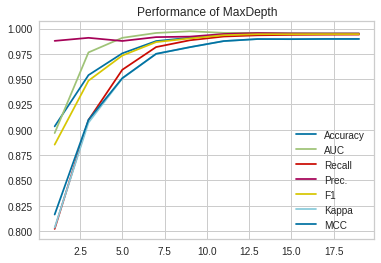

In [15]:
s_dt5 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,pca=True, pca_components= 10,train_size = 0.8)

# init setup


# start a loop
models = []
results = []

for i in np.arange(1,20,2):
    model = create_model('dt', max_depth = i)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)
    
results = pd.concat(results, axis=0)
results.index = np.arange(1,20,2)
# results.plot()
ax = results.plot(title='Performance of MaxDepth')
# ax.set_title("Performance of MaxDepth")
# ax.set_xticklabels(results.index)
fig=ax.get_figure()
# fig.savefig(r'dtnew.png',bbox_inches='tight')
fig.savefig('dtnew1.png',dpi=400,bbox_inches='tight')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9954,0.9943,0.9928,0.9974,0.9951,0.9908,0.9908
1,0.9958,0.9943,0.9943,0.9968,0.9955,0.9916,0.9916
2,0.9952,0.9944,0.9940,0.9957,0.9949,0.9904,0.9904
3,0.9952,0.9942,0.9949,0.9949,0.9949,0.9904,0.9904
4,0.9948,0.9936,0.9932,0.9957,0.9945,0.9896,0.9896
5,0.9946,0.9942,0.9930,0.9955,0.9942,0.9892,0.9892
6,0.9955,0.9951,0.9955,0.9949,0.9952,0.9910,0.9910
7,0.9962,0.9953,0.9938,0.9981,0.9959,0.9924,0.9924
8,0.9960,0.9955,0.9964,0.9951,0.9957,0.9920,0.9920


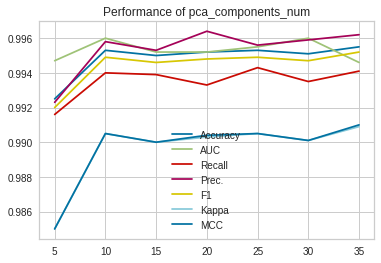

In [7]:
models = []
results = []

def solution(pca_components_num):
    s_dt = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,pca=True, pca_components= pca_components_num,train_size = 0.8)
    model = create_model('dt', max_depth = 15)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

for i in np.arange(5,40,5):
    solution(i)


results = pd.concat(results, axis=0)
results.index = np.arange(5,40,5)
# results.plot()
ax = results.plot(title='Performance of pca_components_num')
# ax.set_title("Performance of MaxDepth")
# ax.set_xticklabels(results.index)
fig=ax.get_figure()
# fig.savefig(r'dtnew.png',bbox_inches='tight')
fig.savefig('dtnew2.png',dpi=400,bbox_inches='tight')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9915,0.9943,0.9940,0.9941,0.9890,0.9890
1,0.9954,0.9942,0.9949,0.9953,0.9951,0.9908,0.9908
2,0.9943,0.9947,0.9940,0.9938,0.9939,0.9886,0.9886
3,0.9947,0.9935,0.9943,0.9945,0.9944,0.9894,0.9894
4,0.9956,0.9964,0.9962,0.9945,0.9953,0.9912,0.9912
5,0.9952,0.9953,0.9957,0.9941,0.9949,0.9904,0.9904
6,0.9955,0.9954,0.9955,0.9949,0.9952,0.9910,0.9910
7,0.9948,0.9928,0.9953,0.9936,0.9945,0.9896,0.9896
8,0.9937,0.9923,0.9934,0.9932,0.9933,0.9874,0.9874


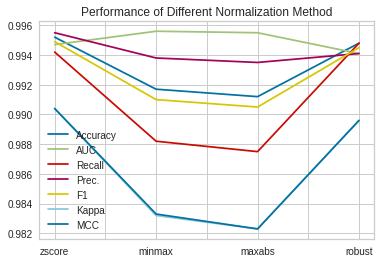

In [16]:
models = []
results = []

def solution(normalize_method_temp):
    s_dt = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = normalize_method_temp, pca=True, pca_components= 10,train_size = 0.8)
    model = create_model('dt', max_depth = 15)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

normalize_method_temps  = ['zscore','minmax','maxabs','robust']
for i in normalize_method_temps:
    solution(i)


results = pd.concat(results, axis=0)
results.index = normalize_method_temps
# results.plot()
ax = results.plot(title='Performance of Different Normalization Method')
# ax.set_title("Performance of MaxDepth")
# ax.set_xticklabels(results.index)
fig=ax.get_figure()
# fig.savefig(r'dtnew.png',bbox_inches='tight')
fig.savefig('dtnew3.png',dpi=400,bbox_inches='tight')

In [17]:
s_dt6 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,pca=True, pca_components= 10,train_size = 0.8)

# init setup

# train decision tree
dt = create_model('dt', max_depth = 15,return_train_score = True)

# access the scoring grid
dt_results = pull()
print(dt_results)
dt_results.to_excel('dt_train.xlsx')
# ax = dt_results.plot(title='Performance of DT')
# # ax.set_title("Performance of MaxDepth")
# # ax.set_xticklabels(results.index)
# fig=ax.get_figure()
# # fig.savefig(r'dtnew.png',bbox_inches='tight')
# fig.savefig('dtnew2.png',dpi=400,bbox_inches='tight')

               Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.9994  1.0000  0.9987  1.0000  0.9993  0.9988  0.9988
         1       0.9994  1.0000  0.9988  1.0000  0.9994  0.9988  0.9988
         2       0.9993  0.9999  0.9986  0.9999  0.9992  0.9985  0.9985
         3       0.9993  1.0000  0.9986  0.9999  0.9993  0.9986  0.9986
         4       0.9993  1.0000  0.9986  1.0000  0.9993  0.9987  0.9987
         5       0.9992  0.9999  0.9984  0.9999  0.9991  0.9984  0.9984
         6       0.9993  0.9999  0.9985  1.0000  0.9992  0.9986  0.9986
         7       0.9990  0.9999  0.9980  0.9998  0.9989  0.9979  0.9979
         8       0.9992  0.9999  0.9984  0.9998  0.9991  0.9983  0.9983
         9       0.9991  0.9999  0.9982  0.9999  0.9991  0.9982  0.9983
CV-Val   0       0.9953  0.9959  0.9934  0.9966  0.9950  0.9906  0.9906
         1       0.9937  0.9942  0.9917  0.9949  0.9933  0.9874 

In [6]:
s_dt7 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'minmax', pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt7))
# model training and selection
# best = compare_models()
dt7 = create_model('dt')
# analyze best model
evaluate_model(dt7)
# predict on new data
predictions_dt7 = predict_model(dt7,data = binary_test123)
# save best pipeline
save_model(dt7,'my_dt7_pipeline')
print(type(predictions_dt7))
predictions_dt7.to_csv('result_dt7.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9961,0.9961,0.9957,0.9959,0.9958,0.9922,0.9922
1,0.9975,0.9976,0.9976,0.9970,0.9973,0.9950,0.9950
2,0.9972,0.9972,0.9964,0.9976,0.9970,0.9944,0.9944
3,0.9971,0.9972,0.9979,0.9959,0.9969,0.9942,0.9942
4,0.9967,0.9968,0.9959,0.9970,0.9965,0.9934,0.9934
5,0.9973,0.9976,0.9979,0.9964,0.9971,0.9946,0.9946
6,0.9973,0.9976,0.9972,0.9970,0.9971,0.9946,0.9946
7,0.9975,0.9975,0.9972,0.9974,0.9973,0.9950,0.9950
8,0.9966,0.9966,0.9962,0.9966,0.9964,0.9932,0.9932


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8022,0.8167,0.7127,0.9221,0.8040,0.6108,0.6316


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [14]:
s_dt77 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt77))
# model training and selection
# best = compare_models()
dt77 = create_model('dt')
# analyze best model
evaluate_model(dt77)
# predict on new data
predictions_dt77 = predict_model(dt77,data = binary_test123)
# save best pipeline
save_model(dt77,'my_dt77_pipeline')
print(type(predictions_dt77))
predictions_dt77.to_csv('result_dt77.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9988,0.9988,0.9994,0.9981,0.9987,0.9976,0.9976
1,0.9987,0.9987,0.9985,0.9987,0.9986,0.9974,0.9974
2,0.9975,0.9974,0.9964,0.9983,0.9973,0.9950,0.9950
3,0.9982,0.9982,0.9981,0.9981,0.9981,0.9964,0.9964
4,0.9983,0.9983,0.9979,0.9985,0.9982,0.9966,0.9966
5,0.9988,0.9988,0.9994,0.9981,0.9987,0.9976,0.9976
6,0.9986,0.9986,0.9987,0.9983,0.9985,0.9972,0.9972
7,0.9994,0.9994,0.9991,0.9996,0.9994,0.9988,0.9988
8,0.9985,0.9986,0.9991,0.9977,0.9984,0.9970,0.9970


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7970,0.8117,0.7061,0.9185,0.7984,0.6009,0.6221


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [7]:
s_dt8 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs', pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt8))
# model training and selection
# best = compare_models()
dt8 = create_model('dt')
# analyze best model
evaluate_model(dt8)
# predict on new data
predictions_dt8 = predict_model(dt8,data = binary_test123)
# save best pipeline
save_model(dt8,'my_dt8_pipeline')
print(type(predictions_dt8))
predictions_dt8.to_csv('result_dt8.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9971,0.9971,0.9964,0.9974,0.9969,0.9942,0.9942
1,0.9967,0.9968,0.9972,0.9957,0.9965,0.9934,0.9934
2,0.9965,0.9966,0.9960,0.9966,0.9963,0.9930,0.9930
3,0.9968,0.9970,0.9966,0.9966,0.9966,0.9936,0.9936
4,0.9966,0.9967,0.9964,0.9964,0.9964,0.9932,0.9932
5,0.9974,0.9976,0.9966,0.9979,0.9972,0.9948,0.9948
6,0.9963,0.9963,0.9951,0.9970,0.9961,0.9926,0.9926
7,0.9971,0.9972,0.9972,0.9966,0.9969,0.9942,0.9942
8,0.9978,0.9979,0.9970,0.9983,0.9977,0.9956,0.9956


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8334,0.8501,0.7312,0.9684,0.8332,0.6731,0.6998


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [15]:
s_dt88 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt88))
# model training and selection
# best = compare_models()
dt88 = create_model('dt')
# analyze best model
evaluate_model(dt88)
# predict on new data
predictions_dt88 = predict_model(dt88,data = binary_test123)
# save best pipeline
save_model(dt88,'my_dt88_pipeline')
print(type(predictions_dt88))
predictions_dt88.to_csv('result_dt88.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9935,0.9935,0.9921,0.9938,0.9929,0.9868,0.9868
1,0.9929,0.9931,0.9921,0.9925,0.9923,0.9856,0.9856
2,0.9934,0.9934,0.9940,0.9917,0.9929,0.9866,0.9866
3,0.9932,0.9933,0.9921,0.9932,0.9926,0.9862,0.9862
4,0.9914,0.9913,0.9906,0.9908,0.9907,0.9826,0.9826
5,0.9928,0.9929,0.9917,0.9927,0.9922,0.9854,0.9854
6,0.9934,0.9934,0.9944,0.9913,0.9929,0.9866,0.9866
7,0.9920,0.9920,0.9906,0.9921,0.9913,0.9838,0.9838
8,0.9916,0.9920,0.9895,0.9923,0.9909,0.9830,0.9830


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8408,0.8542,0.7591,0.9513,0.8444,0.6855,0.7039


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [20]:
s_dt881 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt881))
# model training and selection
# best = compare_models()
dt881 = create_model('dt')
# analyze best model
evaluate_model(dt881)
# predict on new data
predictions_dt881 = predict_model(dt881,data = binary_test123)
# save best pipeline
save_model(dt881,'my_dt881_pipeline')
print(type(predictions_dt881))
predictions_dt881.to_csv('result_dt881.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9953,0.9953,0.9947,0.9953,0.9950,0.9906,0.9906
1,0.9951,0.9951,0.9951,0.9945,0.9948,0.9902,0.9902
2,0.9940,0.9940,0.9936,0.9936,0.9936,0.9880,0.9880
3,0.9954,0.9954,0.9947,0.9955,0.9951,0.9908,0.9908
4,0.9947,0.9946,0.9932,0.9955,0.9944,0.9894,0.9894
5,0.9963,0.9963,0.9960,0.9962,0.9961,0.9926,0.9926
6,0.9961,0.9961,0.9949,0.9968,0.9958,0.9922,0.9922
7,0.9948,0.9948,0.9947,0.9943,0.9945,0.9896,0.9896
8,0.9951,0.9951,0.9949,0.9947,0.9948,0.9902,0.9902


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7858,0.8038,0.6745,0.9301,0.7819,0.5818,0.6110


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [22]:
s_dt882 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,normalize_method = 'maxabs', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt882))
# model training and selection
# best = compare_models()
dt882 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt882)
# predict on new data
predictions_dt882 = predict_model(dt882,data = binary_test123)
# save best pipeline
save_model(dt882,'my_dt882_pipeline')
print(type(predictions_dt882))
predictions_dt882.to_csv('result_dt882.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9961,0.9919,0.9927,0.9923,0.9856,0.9856
1,0.9903,0.9938,0.9853,0.9938,0.9895,0.9804,0.9805
2,0.9901,0.9951,0.9862,0.9925,0.9893,0.9801,0.9801
3,0.9918,0.9964,0.9887,0.9936,0.9911,0.9834,0.9835
4,0.9903,0.9941,0.9864,0.9927,0.9895,0.9805,0.9805
5,0.9921,0.9955,0.9891,0.9938,0.9915,0.9840,0.9841
6,0.9922,0.9968,0.9902,0.9930,0.9916,0.9842,0.9842
7,0.9931,0.9963,0.9911,0.9940,0.9925,0.9860,0.9860
8,0.9931,0.9956,0.9896,0.9955,0.9925,0.9860,0.9861


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8220,0.8632,0.7415,0.9319,0.8259,0.6487,0.6665


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [23]:
s_dt883 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,normalize_method = 'zscore', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt883))
# model training and selection
# best = compare_models()
dt883 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt883)
# predict on new data
predictions_dt883 = predict_model(dt883,data = binary_test123)
# save best pipeline
save_model(dt883,'my_dt883_pipeline')
print(type(predictions_dt883))
predictions_dt883.to_csv('result_dt883.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9947,0.9945,0.9936,0.9951,0.9943,0.9894,0.9894
1,0.9945,0.9942,0.9925,0.9957,0.9941,0.9890,0.9890
2,0.9954,0.9950,0.9945,0.9957,0.9951,0.9908,0.9908
3,0.9939,0.9948,0.9927,0.9942,0.9935,0.9878,0.9878
4,0.9959,0.9968,0.9955,0.9957,0.9956,0.9918,0.9918
5,0.9947,0.9955,0.9927,0.9959,0.9943,0.9894,0.9894
6,0.9951,0.9943,0.9936,0.9959,0.9948,0.9902,0.9902
7,0.9948,0.9959,0.9927,0.9961,0.9944,0.9896,0.9896
8,0.9945,0.9939,0.9921,0.9961,0.9941,0.9890,0.9890


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7999,0.8498,0.6975,0.9344,0.7988,0.6080,0.6339


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [24]:
s_dt884 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,normalize_method = 'minmax', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt884))
# model training and selection
# best = compare_models()
dt884 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt884)
# predict on new data
predictions_dt884 = predict_model(dt884,data = binary_test123)
# save best pipeline
save_model(dt884,'my_dt884_pipeline')
print(type(predictions_dt884))
predictions_dt884.to_csv('result_dt884.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9932,0.9954,0.9910,0.9942,0.9926,0.9862,0.9862
1,0.9900,0.9944,0.9863,0.9921,0.9892,0.9798,0.9799
2,0.9911,0.9938,0.9902,0.9906,0.9904,0.9820,0.9820
3,0.9929,0.9954,0.9891,0.9955,0.9923,0.9856,0.9857
4,0.9888,0.9939,0.9863,0.9895,0.9879,0.9775,0.9775
5,0.9921,0.9962,0.9874,0.9955,0.9914,0.9840,0.9841
6,0.9908,0.9950,0.9857,0.9944,0.9900,0.9814,0.9815
7,0.9923,0.9954,0.9908,0.9925,0.9917,0.9844,0.9844
8,0.9918,0.9959,0.9883,0.9940,0.9911,0.9834,0.9835


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8325,0.8705,0.7270,0.9718,0.8317,0.6718,0.7001


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [31]:
s_dt886 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,normalize_method = 'minmax', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt886))
# model training and selection
# best = compare_models()
dt886 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt886)
# predict on new data
predictions_dt886 = predict_model(dt886,data = binary_test123)
# save best pipeline
save_model(dt886,'my_dt886_pipeline')
print(type(predictions_dt886))
predictions_dt886.to_csv('result_dt886.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9923,0.9960,0.9898,0.9936,0.9917,0.9844,0.9844
1,0.9908,0.9957,0.9887,0.9914,0.9901,0.9815,0.9815
2,0.9919,0.9958,0.9876,0.9948,0.9912,0.9836,0.9837
3,0.9925,0.9966,0.9908,0.9929,0.9919,0.9848,0.9848
4,0.9940,0.9962,0.9919,0.9953,0.9936,0.9880,0.9880
5,0.9897,0.9940,0.9863,0.9914,0.9889,0.9793,0.9793
6,0.9910,0.9946,0.9883,0.9923,0.9903,0.9818,0.9819
7,0.9936,0.9964,0.9902,0.9959,0.9930,0.9870,0.9870
8,0.9915,0.9962,0.9898,0.9919,0.9908,0.9828,0.9828


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8182,0.8631,0.7330,0.9332,0.8211,0.6416,0.6610


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [38]:
s_dt885 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True,normalize_method = 'robust', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt885))
# model training and selection
# best = compare_models()
dt885 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt885)
# predict on new data
predictions_dt885 = predict_model(dt885,data = binary_test123)
# save best pipeline
save_model(dt885,'my_dt885_pipeline')
print(type(predictions_dt885))
predictions_dt885.to_csv('result_dt885.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9964,0.9958,0.9964,0.9959,0.9962,0.9928,0.9928
1,0.9946,0.9959,0.9942,0.9942,0.9942,0.9892,0.9892
2,0.9954,0.9959,0.9945,0.9957,0.9951,0.9908,0.9908
3,0.9953,0.9955,0.9945,0.9955,0.9950,0.9906,0.9906
4,0.9957,0.9960,0.9947,0.9962,0.9954,0.9914,0.9914
5,0.9956,0.9957,0.9951,0.9955,0.9953,0.9912,0.9912
6,0.9950,0.9955,0.9947,0.9947,0.9947,0.9900,0.9900
7,0.9952,0.9956,0.9953,0.9945,0.9949,0.9904,0.9904
8,0.9939,0.9947,0.9945,0.9925,0.9935,0.9878,0.9878


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7807,0.8519,0.6357,0.9682,0.7675,0.5763,0.6224


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [34]:
s_dt888 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt888))
# model training and selection
# best = compare_models()
dt888 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt888)
# predict on new data
predictions_dt888 = predict_model(dt888,data = binary_test123)
# save best pipeline
save_model(dt888,'my_dt888_pipeline')
print(type(predictions_dt888))
predictions_dt888.to_csv('result_dt888.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9916,0.9959,0.9889,0.9929,0.9909,0.9830,0.9830
1,0.9927,0.9960,0.9912,0.9929,0.9921,0.9852,0.9852
2,0.9908,0.9960,0.9874,0.9927,0.9900,0.9814,0.9815
3,0.9925,0.9961,0.9897,0.9940,0.9919,0.9848,0.9848
4,0.9920,0.9956,0.9906,0.9921,0.9913,0.9838,0.9838
5,0.9904,0.9938,0.9870,0.9923,0.9896,0.9806,0.9807
6,0.9920,0.9963,0.9874,0.9953,0.9913,0.9838,0.9839
7,0.9903,0.9939,0.9889,0.9902,0.9895,0.9805,0.9805
8,0.9908,0.9957,0.9865,0.9935,0.9900,0.9814,0.9815


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8364,0.8755,0.7565,0.9452,0.8404,0.6768,0.6945


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [36]:
s_dt8881 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs', pca =True, pca_components= 10,log_data = True,train_size = 0.8)
print(type(s_dt8881))
# model training and selection
# best = compare_models()
dt8881 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt8881)
# predict on new data
predictions_dt8881 = predict_model(dt8881,data = binary_test123)
# save best pipeline
save_model(dt8881,'my_dt8881_pipeline')
print(type(predictions_dt8881))
predictions_dt8881.to_csv('result_dt8881.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9929,0.9962,0.9908,0.9938,0.9923,0.9856,0.9856
1,0.9905,0.9942,0.9862,0.9933,0.9897,0.9809,0.9809
2,0.9934,0.9960,0.9921,0.9936,0.9929,0.9866,0.9866
3,0.9917,0.9957,0.9887,0.9934,0.9910,0.9832,0.9833
4,0.9909,0.9958,0.9870,0.9934,0.9902,0.9816,0.9817
5,0.9918,0.9951,0.9898,0.9925,0.9911,0.9834,0.9835
6,0.9907,0.9945,0.9881,0.9919,0.9900,0.9813,0.9813
7,0.9921,0.9952,0.9879,0.9951,0.9914,0.9840,0.9841
8,0.9914,0.9945,0.9881,0.9934,0.9907,0.9826,0.9827


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8248,0.8707,0.7476,0.9310,0.8293,0.6537,0.6704


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [8]:
# ,feature_selection = True,feature_selection_method = 'boruta'
s_dt9 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',feature_selection = True,feature_selection_method = 'boruta', pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt9))
# model training and selection
# best = compare_models()
dt9 = create_model('dt')
# analyze best model
evaluate_model(dt9)
# predict on new data
predictions_dt9 = predict_model(dt9,data = binary_test123)
# save best pipeline
save_model(dt9,'my_dt9_pipeline')
print(type(predictions_dt9))
predictions_dt9.to_csv('result_dt9.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9958,0.9959,0.9949,0.9962,0.9955,0.9916,0.9916
1,0.9968,0.9969,0.9964,0.9968,0.9966,0.9936,0.9936
2,0.9968,0.9971,0.9966,0.9966,0.9966,0.9936,0.9936
3,0.9979,0.9982,0.9975,0.9981,0.9978,0.9958,0.9958
4,0.9975,0.9975,0.9972,0.9975,0.9973,0.9950,0.9950
5,0.9969,0.9971,0.9966,0.9968,0.9967,0.9938,0.9938
6,0.9981,0.9981,0.9975,0.9985,0.9980,0.9962,0.9962
7,0.9973,0.9975,0.9979,0.9964,0.9971,0.9946,0.9946
8,0.9974,0.9973,0.9962,0.9983,0.9972,0.9948,0.9948


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8235,0.8391,0.7275,0.9509,0.8243,0.6532,0.6770


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [9]:
# ,feature_selection = True,feature_selection_method = 'boruta'
s_dt10 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',feature_selection = True,feature_selection_method = 'boruta',log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt10))
# model training and selection
# best = compare_models()
dt10 = create_model('dt')
# analyze best model
evaluate_model(dt10)
# predict on new data
predictions_dt10 = predict_model(dt10,data = binary_test123)
# save best pipeline
save_model(dt10,'my_dt10_pipeline')
print(type(predictions_dt10))
predictions_dt10.to_csv('result_dt10.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9967,0.9967,0.9966,0.9964,0.9965,0.9934,0.9934
1,0.9977,0.9977,0.9979,0.9972,0.9975,0.9954,0.9954
2,0.9966,0.9968,0.9964,0.9964,0.9964,0.9932,0.9932
3,0.9978,0.9979,0.9974,0.9979,0.9977,0.9956,0.9956
4,0.9970,0.9971,0.9962,0.9974,0.9968,0.9940,0.9940
5,0.9967,0.9967,0.9959,0.9970,0.9965,0.9934,0.9934
6,0.9976,0.9977,0.9972,0.9977,0.9974,0.9952,0.9952
7,0.9976,0.9976,0.9968,0.9981,0.9974,0.9952,0.9952
8,0.9976,0.9976,0.9977,0.9972,0.9974,0.9952,0.9952


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8299,0.8409,0.7631,0.9250,0.8363,0.6627,0.6760


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [12]:
# ,feature_selection = True,feature_selection_method = 'boruta'
s_dt11 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',feature_selection = True,feature_selection_method = 'classic',log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt11))
# model training and selection
# best = compare_models()
dt11 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt11)
# predict on new data
predictions_dt11 = predict_model(dt11,data = binary_test123)
# save best pipeline
save_model(dt11,'my_dt11_pipeline')
print(type(predictions_dt11))
predictions_dt11.to_csv('result_dt11.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9966,0.9961,0.9945,0.9983,0.9964,0.9932,0.9932
1,0.9974,0.9981,0.9957,0.9987,0.9972,0.9948,0.9948
2,0.9980,0.9986,0.9977,0.9981,0.9979,0.9960,0.9960
3,0.9965,0.9973,0.9951,0.9974,0.9963,0.9930,0.9930
4,0.9964,0.9975,0.9962,0.9962,0.9962,0.9928,0.9928
5,0.9974,0.9981,0.9962,0.9983,0.9972,0.9948,0.9948
6,0.9961,0.9968,0.9938,0.9979,0.9958,0.9922,0.9922
7,0.9982,0.9989,0.9977,0.9985,0.9981,0.9964,0.9964
8,0.9970,0.9979,0.9964,0.9972,0.9968,0.9940,0.9940


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8097,0.8483,0.7016,0.9512,0.8076,0.6276,0.6562


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [9]:
# ,feature_selection = True,feature_selection_method = 'boruta'
s_dt111 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True,pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt111))
# model training and selection
# best = compare_models()
dt111 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt111)
# predict on new data
predictions_dt111 = predict_model(dt111,data = binary_test123)
# save best pipeline
save_model(dt111,'my_dt111_pipeline')
print(type(predictions_dt111))
predictions_dt111.to_csv('result_dt111.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9919,0.9960,0.9898,0.9927,0.9913,0.9836,0.9837
1,0.9911,0.9945,0.9876,0.9931,0.9904,0.9820,0.9821
2,0.9932,0.9974,0.9900,0.9953,0.9926,0.9862,0.9862
3,0.9917,0.9960,0.9879,0.9942,0.9910,0.9832,0.9833
4,0.9906,0.9955,0.9857,0.9940,0.9898,0.9810,0.9811
5,0.9900,0.9954,0.9872,0.9912,0.9892,0.9799,0.9799
6,0.9914,0.9952,0.9868,0.9946,0.9907,0.9826,0.9827
7,0.9931,0.9958,0.9928,0.9923,0.9925,0.9860,0.9860
8,0.9904,0.9936,0.9857,0.9936,0.9896,0.9806,0.9807


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8155,0.8473,0.7288,0.9322,0.8181,0.6365,0.6564


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [12]:
# ,feature_selection = True,feature_selection_method = 'boruta'
s_dt1111 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True,pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt1111))
# model training and selection
# best = compare_models()
dt1111 = create_model('dt', max_depth = 15)
# analyze best model
evaluate_model(dt1111)
# predict on new data
predictions_dt1111 = predict_model(dt1111,data = binary_test123)
# save best pipeline
save_model(dt1111,'my_dt1111_pipeline')
print(type(predictions_dt1111))
predictions_dt1111.to_csv('result_dt1111.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9926,0.9959,0.9900,0.9940,0.9920,0.9850,0.9850
1,0.9921,0.9956,0.9880,0.9948,0.9914,0.9840,0.9841
2,0.9925,0.9962,0.9893,0.9944,0.9919,0.9848,0.9848
3,0.9917,0.9947,0.9895,0.9925,0.9910,0.9832,0.9832
4,0.9924,0.9953,0.9906,0.9929,0.9918,0.9846,0.9846
5,0.9923,0.9961,0.9893,0.9940,0.9916,0.9844,0.9844
6,0.9917,0.9946,0.9887,0.9933,0.9910,0.9832,0.9832
7,0.9937,0.9961,0.9904,0.9961,0.9933,0.9874,0.9874
8,0.9916,0.9957,0.9887,0.9931,0.9909,0.9830,0.9830


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8239,0.8765,0.7354,0.9427,0.8263,0.6533,0.6740


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [13]:
s_dt9 = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'robust',pca=True, pca_components= 10,log_plots = True, log_data = True,train_size = 0.8,use_gpu = True,log_profile = True)
print(type(s_dt9))
# model training and selection
# best = compare_models()
dt9 = create_model('dt')
# analyze best model
evaluate_model(dt9)
# predict on new data
predictions_dt9 = predict_model(dt9,data = binary_test123)
# save best pipeline
save_model(dt9,'my_dt9_pipeline')
print(type(predictions_dt9))
predictions_dt9.to_csv('result_dt9.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9946,0.9946,0.9938,0.9947,0.9943,0.9892,0.9892
1,0.9947,0.9949,0.9962,0.9926,0.9944,0.9894,0.9894
2,0.9955,0.9956,0.9966,0.9939,0.9952,0.9910,0.9910
3,0.9955,0.9957,0.9962,0.9943,0.9952,0.9910,0.9910
4,0.9948,0.9949,0.9958,0.9932,0.9945,0.9896,0.9896
5,0.9954,0.9956,0.9962,0.9941,0.9951,0.9908,0.9908
6,0.9947,0.9948,0.9953,0.9934,0.9944,0.9894,0.9894
7,0.9958,0.9958,0.9960,0.9951,0.9955,0.9916,0.9916
8,0.9947,0.9948,0.9951,0.9936,0.9944,0.9894,0.9894


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5418,0.5958,0.2098,0.9344,0.3427,0.1693,0.2823


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [5]:
s_gbc = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True,pca_components= 10, train_size = 0.8)
print(type(s_gbc))
# model training and selection
# best = compare_models()
gbc = create_model('gbc')
# analyze best model
evaluate_model(gbc)
# predict on new data
predictions_gbc = predict_model(gbc,data = binary_test123)
# save best pipeline
save_model(gbc,'my_gbc_pipeline')
print(type(predictions_gbc))
predictions_gbc.to_csv('result_gbc.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9835,0.9987,0.9721,0.9924,0.9821,0.9669,0.9670
1,0.9827,0.9984,0.9701,0.9926,0.9812,0.9653,0.9655
2,0.9841,0.9986,0.9751,0.9907,0.9828,0.9681,0.9682
3,0.9817,0.9985,0.9697,0.9908,0.9802,0.9633,0.9635
4,0.9806,0.9984,0.9672,0.9908,0.9789,0.9609,0.9611
5,0.9798,0.9981,0.9693,0.9870,0.9781,0.9593,0.9594
6,0.9837,0.9986,0.9725,0.9924,0.9823,0.9673,0.9674
7,0.9818,0.9984,0.9704,0.9904,0.9803,0.9635,0.9636
8,0.9818,0.9985,0.9710,0.9898,0.9803,0.9635,0.9636


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7928,0.9523,0.6561,0.9703,0.7829,0.5984,0.6407


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [6]:
s_ada = setup(binary_train123,target ='label',numeric_features = col,categorical_features = col_cat,normalize = True, normalize_method = 'maxabs',pca = True,pca_components= 10,train_size = 0.8)
print(type(s_ada))
# model training and selection
# best = compare_models()
ada = create_model('ada')
# analyze best model
evaluate_model(ada)
# predict on new data
predictions_ada = predict_model(ada,data = binary_test123)
# save best pipeline
save_model(ada,'my_ada_pipeline')
print(type(predictions_ada))
predictions_ada.to_csv('result_ada.csv',index=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9787,0.9978,0.9723,0.9817,0.9769,0.9571,0.9571
1,0.9731,0.9970,0.9588,0.9829,0.9707,0.9459,0.9461
2,0.9760,0.9977,0.9661,0.9820,0.9740,0.9517,0.9518
3,0.9767,0.9976,0.9665,0.9831,0.9747,0.9531,0.9532
4,0.9744,0.9974,0.9622,0.9823,0.9722,0.9485,0.9486
5,0.9760,0.9972,0.9650,0.9830,0.9739,0.9517,0.9518
6,0.9782,0.9975,0.9646,0.9882,0.9762,0.9561,0.9563
7,0.9765,0.9973,0.9654,0.9837,0.9745,0.9527,0.9528
8,0.9742,0.9975,0.9596,0.9845,0.9719,0.9481,0.9483


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7635,0.9413,0.6054,0.9668,0.7445,0.5451,0.5975


Transformation Pipeline and Model Successfully Saved
<class 'pandas.core.frame.DataFrame'>


In [10]:
s_lightgbm = setup(binary_train123,target ='label')
# model training and selection
# best = compare_models()
lightgbm = create_model('lightgbm')
# analyze best model
evaluate_model(lightgbm)
# predict on new data
predictions_lightgbm = predict_model(lightgbm,data = binary_test123)
# save best pipeline
save_model(lightgbm,'my_lightgbm_pipeline')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9999,0.9993,0.9998,0.9995,0.9991,0.9991
1,0.9989,1.0000,0.9990,0.9985,0.9988,0.9977,0.9977
2,0.9992,1.0000,0.9990,0.9993,0.9991,0.9984,0.9984
3,0.9993,1.0000,0.9985,1.0000,0.9993,0.9986,0.9986
4,0.9989,1.0000,0.9985,0.9990,0.9988,0.9977,0.9977
5,0.9988,1.0000,0.9983,0.9990,0.9987,0.9975,0.9975
6,0.9990,1.0000,0.9990,0.9988,0.9989,0.9979,0.9979
7,0.9989,1.0000,0.9983,0.9993,0.9988,0.9977,0.9977
8,0.9990,1.0000,0.9990,0.9988,0.9989,0.9979,0.9979


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7881,0.9566,0.6489,0.9685,0.7771,0.5897,0.6331


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

In [15]:
s_lightgbm = setup(binary_train123,target ='label',numeric_features=col)
# model training and selection
# best = compare_models()
lightgbm = create_model('lightgbm')
# analyze best model
evaluate_model(lightgbm)
# predict on new data
predictions_lightgbm = predict_model(lightgbm,data = binary_test123)
# save best pipeline
save_model(lightgbm,'my_lightgbm_pipeline')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,1.0000,0.9990,0.9998,0.9994,0.9989,0.9989
1,0.9992,1.0000,0.9990,0.9993,0.9991,0.9984,0.9984
2,0.9994,1.0000,0.9993,0.9995,0.9994,0.9989,0.9989
3,0.9989,1.0000,0.9980,0.9995,0.9988,0.9977,0.9977
4,0.9993,1.0000,0.9988,0.9998,0.9993,0.9986,0.9986
5,0.9993,1.0000,0.9990,0.9995,0.9993,0.9986,0.9986
6,0.9985,1.0000,0.9988,0.9980,0.9984,0.9970,0.9970
7,0.9991,1.0000,0.9985,0.9995,0.9990,0.9982,0.9982
8,0.9990,0.9999,0.9983,0.9995,0.9989,0.9979,0.9979


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7835,0.9629,0.6416,0.9670,0.7714,0.5813,0.6258


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['duration',
                                                           'src_bytes',
                                                           'dst_bytes', 'land',
                                                           'wrong_fragment',
                                                           'urgent', 'hot',
                                                           'num_failed_logins',
                                                           'logged_in',
                                                           'num_compromised',
                                                           'root_shell',
     

In [16]:
s_rf = setup(binary_train123,target ='label',numeric_features=col)
# model training and selection
# best = compare_models()
rf = create_model('rf')
# analyze best model
evaluate_model(rf)
# predict on new data
predictions_rf= predict_model(rf,data = binary_test123)
# save best pipeline
save_model(rf,'my_lightgbm_numericfeature_pipeline')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9984,1.0000,0.9968,0.9998,0.9983,0.9968,0.9968
1,0.9989,1.0000,0.9983,0.9993,0.9988,0.9977,0.9977
2,0.9982,1.0000,0.9971,0.9990,0.9980,0.9964,0.9964
3,0.9989,1.0000,0.9980,0.9995,0.9988,0.9977,0.9977
4,0.9986,1.0000,0.9978,0.9993,0.9985,0.9973,0.9973
5,0.9984,1.0000,0.9976,0.9990,0.9983,0.9968,0.9968
6,0.9990,1.0000,0.9980,0.9998,0.9989,0.9979,0.9979
7,0.9981,1.0000,0.9968,0.9990,0.9979,0.9961,0.9961
8,0.9986,1.0000,0.9971,1.0000,0.9985,0.9973,0.9973


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7707,0.9586,0.6170,0.9688,0.7539,0.5582,0.6085


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['duration',
                                                           'src_bytes',
                                                           'dst_bytes', 'land',
                                                           'wrong_fragment',
                                                           'urgent', 'hot',
                                                           'num_failed_logins',
                                                           'logged_in',
                                                           'num_compromised',
                                                           'root_shell',
     

In [17]:
# Classification
# from pycaret.classification import *

# clf1 = setup(data = binary_train123, target = 'label')
# init setup
from pycaret.classification import *
snew = setup(binary_train123,target ='label',numeric_features=col)
# model training and selection
best = compare_models()
# analyze best model
evaluate_model(best)
# predict on new data
predictions = predict_model(best,data = binary_test123)
# save best pipeline
save_model(best,'my_best_pipeline')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9991,1.0000,0.9987,0.9993,0.9990,0.9981,0.9981,530.6630
lightgbm,Light Gradient Boosting Machine,0.9989,1.0000,0.9986,0.9991,0.9989,0.9979,0.9979,0.9210
rf,Random Forest Classifier,0.9988,1.0000,0.9979,0.9995,0.9987,0.9976,0.9976,4.0070
dt,Decision Tree Classifier,0.9985,0.9985,0.9983,0.9985,0.9984,0.9970,0.9970,0.6160
et,Extra Trees Classifier,0.9985,0.9998,0.9976,0.9992,0.9984,0.9971,0.9971,4.8160
gbc,Gradient Boosting Classifier,0.9953,0.9997,0.9943,0.9956,0.9950,0.9906,0.9906,11.5660
knn,K Neighbors Classifier,0.9944,0.9981,0.9954,0.9926,0.9940,0.9888,0.9888,11.1520
ada,Ada Boost Classifier,0.9908,0.9994,0.9882,0.9921,0.9901,0.9816,0.9816,3.1640
ridge,Ridge Classifier,0.9656,0.0000,0.9500,0.9754,0.9625,0.9307,0.9310,0.1790
lda,Linear Discriminant Analysis,0.9656,0.9938,0.9500,0.9753,0.9625,0.9307,0.9310,1.9500


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7953,0.9641,0.6620,0.9684,0.7864,0.6028,0.6434


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['duration',
                                                           'src_bytes',
                                                           'dst_bytes', 'land',
                                                           'wrong_fragment',
                                                           'urgent', 'hot',
                                                           'num_failed_logins',
                                                           'logged_in',
                                                           'num_compromised',
                                                           'root_shell',
     

In [14]:
# 第一步,获取列名
col = list(binary_train123.columns)
col.remove('label')
print(col)
# print(col_122)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'se